**수업에 필요한 모듈을 임포트하여라.** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

실습에 앞서, `matplotlib` 패키지의 글꼴을 한글 표시가 가능하도록 한글을 지원하는 글꼴로 바꿔준다. 혹시 한글 표시에 오류가 발생한다면 상단 메뉴에서 [런타임]>[런타임 다시 시작] 또는 [다시 시작 및 모두 실행] 을 눌러 런타임을 재시작하면 된다.  

In [ ]:
!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cach

**문제1) 아래의 질문에 답하여라.**

`user.txt` 파일을 열어보면, 데이터는 `|`를 기준으로 구분되어 저장되어 있다. 

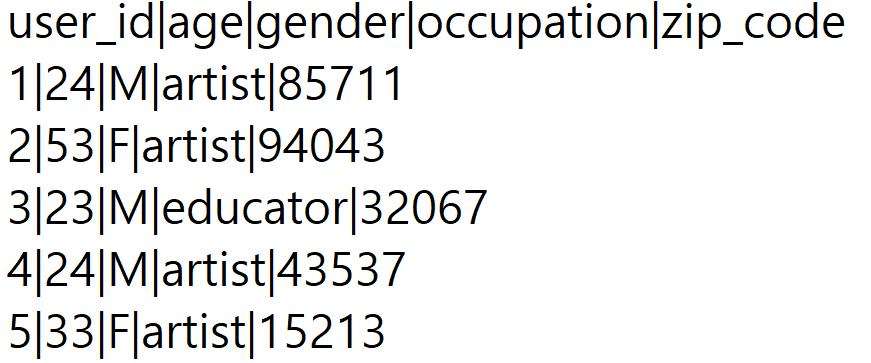

1) `user.txt` 파일을 읽어 데이터프레임 `users`를 만들어라. 인덱스(index)는 `user_id`로 한다. 

이때, `pd.read_csv()`도 가능하지만, `pd.read_table()`을 사용해보자.  

* `read_table()` : 파일, URL, 또는 파일과 유사한 객체로부터 구분된 데이터를 읽어온다. 
  * 기본 구분자(`sep`)는 탭(`\t`)이다.   
  * 인덱스는 `index_col`로 지정할 수 있다. 

In [ ]:
# 먼저, Google Colab에 파일을 올려준다.
from google.colab import files
uploaded = files.upload()

Saving user.txt to user.txt


In [ ]:
# read_table을 이용하여 txt파일을 DataFrame으로 읽어주자.
users = pd.read_table("user.txt", delimiter= '|', index_col= 'user_id')

아래와 같이 코드를 작성할 수도 있다. 

In [ ]:
users = pd.read_table('user.txt', sep = '|', index_col = 'user_id')
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,artist,85711
2,53,F,artist,94043
3,23,M,educator,32067
4,24,M,artist,43537
5,33,F,artist,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,engineer,02215
941,20,M,student,97229


2) 데이터프레임 `users`의 처음 5개의 행을 확인하여라.

In [ ]:
# 데이터 프레임의 첫 행들을 읽어주는 method는 .head() 이다
print(users.head(5))

         age gender occupation zip_code
user_id                                
1         24      M     artist    85711
2         53      F     artist    94043
3         23      M   educator    32067
4         24      M     artist    43537
5         33      F     artist    15213


3) 데이터프레임 `users`의 기본 정보를 확인하여라.
  * `users`의 열(column)에는 어떠한 것이 있는가? 열의 개수는 몇 개인가?
  * `users`에는 몇 개의 관측치가 있는가?
  * `users`에 결측치가 있는가? 있다면 몇 개가 있는가? 

In [ ]:
""" users의 기본 정보를 확인하자. """

# 1. users의 열(column)에는 어떠한 것이 있는가? 열의 개수는 몇 개인가?
print("열(Column) 확인:", tuple(users.columns))
print("열의 개수:", len(users.columns))

# users는 user별 나이, 성별, 직업, 주소 정보를 담고 있음을 알 수 있다.

# 2. 관측치 개수 확인
print("관측치수:", len(users))

# 943개의 관측치를 담고 있다.

# 3. 결측치 확인
print("age 열 결측치 수:", sum(users.age.isna()))
print("gender 열 결측치 수:", sum(users.gender.isna()))
print("occupation 열 결측치 수:", sum(users.occupation.isna()))
print("zip_code 열 결측치 수:", sum(users.zip_code.isna()))

# 모든 열에서 결측치는 없다.

열(Column) 확인: ('age', 'gender', 'occupation', 'zip_code')
열의 개수: 4
관측치수: 943
age 열 결측치 수: 0
gender 열 결측치 수: 0
occupation 열 결측치 수: 0
zip_code 열 결측치 수: 0


또는 `info()` 메소드를 통해서 확인할 수도 있다. 

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


4) `age`열에 대하여 사분위수를 이용하여 이상치를 확인하여라.

필요하다면, `quantile()` 메소드를 사용한다.

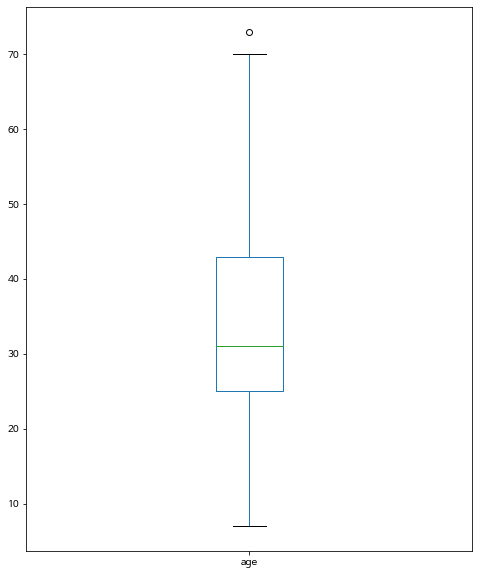

         age gender occupation zip_code  Lower  Upper  Outlier
user_id                                                       
481       73      M    retired    37771   -2.0   70.0     True


In [ ]:
""" age 열의 사분위수, 이상치 확인 """

# 1. 먼저, 시각적으로 이상치가 있는지 확인해보자
# 데이터프레임의 method인 boxplot을 이용해준다.

fig = plt.figure(figsize = (8, 10)) 

# Series는 boxplot method를 이용할 수 없다. 따라서, DataFrame으로 바꿔준 후, boxplot을 이용한다.
pd.DataFrame(users['age']).boxplot(grid=False) #  grid를 False로 둔다.

plt.show()

# 한 개의 이상치가 있어 보인다.

# 2. 이제, quantile() method를 이용하여 이상치가 구체적으로 무엇인지 확인해보자.

users['Lower'] = users['age'].quantile(q = .25) - (1.5*(users['age'].quantile(q = .75) - users['age'].quantile(q = .25)))
users['Upper'] = users['age'].quantile(q = .75) + (1.5*(users['age'].quantile(q = .75) - users['age'].quantile(q = .25)))

# Series의 불린 연산은 |을 이용해야 한다.
users['Outlier'] = (users['age'] < users['Lower']) | (users['age'] > users['Upper'])

print(users[users.Outlier == True])

# 고령의 user가 users에 포함되어 있다.

5) `occupation`열에는 어떠한 직업이 있는가? 각 직업별 인원수를 구하여라. 


In [ ]:
""" 각 직업별 인원수 구하기 """

# 직업별 -> ~~별은 groupby() method를 이용해주자.
users_by_occ = users.groupby('occupation')

# count() 를 이용하여 관측치 수(즉, 인원수) 확인
print(users_by_occ.count()['age'])

occupation
artist      257
educator    214
engineer    235
retired      14
student     223
Name: age, dtype: int64


아래와 같이 구할 수도 있다. 

In [ ]:
users.occupation.value_counts()

artist      257
engineer    235
student     223
educator    214
retired      14
Name: occupation, dtype: int64

6) 데이터프레임`users`의 `age`와 `occupation` 열을 담은 데이터프레임`users_age`를 만들어라. 

In [ ]:
""" users_age 데이터프레임 만들기 """
users_age = users.loc[:,['age','occupation']]

7) 데이터프레임 `users_age`를 `occupation`을 기준으로 그룹으로 분리한 후, 각 그룹에 있는 `age`에 대해서 사분위수를 이용하여 이상치를 확인하여라. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x576 with 0 Axes>

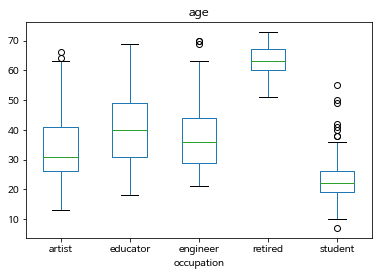

         age occupation  Lower  Upper  Outlier
user_id                                       
30         7    student    8.5   36.5     True
39        41    student    8.5   36.5     True
188       42    student    8.5   36.5     True
211       66     artist    3.5   63.5     True
418       55    student    8.5   36.5     True
423       64     artist    3.5   63.5     True
559       69   engineer    6.5   66.5     True
565       40    student    8.5   36.5     True
767       70   engineer    6.5   66.5     True
803       70   engineer    6.5   66.5     True
839       38    student    8.5   36.5     True
861       38    student    8.5   36.5     True
915       50    student    8.5   36.5     True
926       49    student    8.5   36.5     True


In [ ]:
""" 직업별 이상치 확인 """

# 1. 먼저, boxplot을 이용하여서 이상치가 있는지, 시각적으로 확인해보자
plt.figure(figsize=(10,8))
users_age.boxplot(column=['age'],grid = False, by = 'occupation') 
plt.suptitle('')
plt.show()

# 직업별로, 이상치의 개수가 차이가 난다.

# 2. 다음으로, 직업별 이상치를 groupby()와 quantile() method를 이용하여서 확인해주자.

users_age_by_occ = users_age.groupby('occupation')

# lambda 함수와 transform() method를 이용하여 짤 수 있다.
users_age['Lower'] = users_age_by_occ['age'].transform(lambda x : x.quantile(q = .25)- 1.5*(x.quantile(q = .75) - x.quantile(q= .25)))
users_age['Upper'] = users_age_by_occ['age'].transform(lambda x : x.quantile(q = .75)+ 1.5*(x.quantile(q = .75) - x.quantile(q= .25)))
users_age['Outlier'] = (users_age['age'] < users_age['Lower']) | (users_age['age'] > users_age['Upper'])
print(users_age[users_age.Outlier == True])

**문제2)**  아래의 질문에 답하여라. 

아래의 모듈을 임포트하여라. 

In [ ]:
from wordcloud import WordCloud

1) `bts.txt`에는 BTS의 노래 가사가 담겨져 있다. 파일을 불러와서 bts 변수에 할당하여라. 

In [ ]:
# 먼저, Google Colab에 파일을 올려준다.
from google.colab import files
uploaded = files.upload()

Saving bts.txt to bts (1).txt


In [ ]:
# bts.txt 파일 읽기
with open("bts.txt",'r') as bts_text:
  bts = bts_text.read()

# bts 변수 확인하기.
print(bts)

Smooth like butter
Like a criminal undercover
Gon' pop like trouble
Breakin' into your heart like that
Cool shade stunner
Yeah I owe it all to my mother
Hot like summer
Yeah I'm makin' you sweat like that
Break it down
Oh when I look in the mirror
I'll melt your heart into 2
I got that superstar glow so
Do the boogie like
Side step right left to my beat (heartbeat)
High like the moon rock with me baby
Know that I got that heat
Let me show you 'cause talk is cheap
Side step right left to my beat (heartbeat)
Get it, let it roll
Smooth like butter
Pull you in like no other
Don't need no Usher
To remind me you got it bad
Ain't no other
That can sweep you up like a robber
Straight up, I got ya
Makin' you fall like that
Break it down
Oh when I look in the mirror
I'll melt your heart into 2
I got that superstar glow so
Do the boogie like
Side step right left to my beat (heartbeat)
High like the moon rock with me baby
Know that I got that heat
Let me show you 'cause talk is cheap
Side step rig

2) bts 에서 `\n`, `\'`, `,`, `(`, `)`를 공백(space)으로 변경하고, 영어는 대문자로 변경하여라. 

In [ ]:
# 공백으로 변경
bts = bts.replace('\n',' ')
bts = bts.replace('\'' ,' ')
bts = bts.replace(',' ,' ')
bts = bts.replace('(' ,' ')
bts = bts.replace(')' ,' ')

# 대문자 변경
bts = bts.upper()
bts

'SMOOTH LIKE BUTTER LIKE A CRIMINAL UNDERCOVER GON  POP LIKE TROUBLE BREAKIN  INTO YOUR HEART LIKE THAT COOL SHADE STUNNER YEAH I OWE IT ALL TO MY MOTHER HOT LIKE SUMMER YEAH I M MAKIN  YOU SWEAT LIKE THAT BREAK IT DOWN OH WHEN I LOOK IN THE MIRROR I LL MELT YOUR HEART INTO 2 I GOT THAT SUPERSTAR GLOW SO DO THE BOOGIE LIKE SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  HIGH LIKE THE MOON ROCK WITH ME BABY KNOW THAT I GOT THAT HEAT LET ME SHOW YOU  CAUSE TALK IS CHEAP SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  GET IT  LET IT ROLL SMOOTH LIKE BUTTER PULL YOU IN LIKE NO OTHER DON T NEED NO USHER TO REMIND ME YOU GOT IT BAD AIN T NO OTHER THAT CAN SWEEP YOU UP LIKE A ROBBER STRAIGHT UP  I GOT YA MAKIN  YOU FALL LIKE THAT BREAK IT DOWN OH WHEN I LOOK IN THE MIRROR I LL MELT YOUR HEART INTO 2 I GOT THAT SUPERSTAR GLOW SO DO THE BOOGIE LIKE SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  HIGH LIKE THE MOON ROCK WITH ME BABY KNOW THAT I GOT THAT HEAT LET ME SHOW YOU  CAUSE TALK IS CHEAP SIDE STEP RI

아래와 같이 코드를 작성할 수도 있다.

In [ ]:
rm = ["\n", "\'", ",", "(", ")"]

for i in range(len(rm)) :
  bts = bts.replace(rm[i], ' ')

bts = bts.upper()
bts

'SMOOTH LIKE BUTTER LIKE A CRIMINAL UNDERCOVER GON  POP LIKE TROUBLE BREAKIN  INTO YOUR HEART LIKE THAT COOL SHADE STUNNER YEAH I OWE IT ALL TO MY MOTHER HOT LIKE SUMMER YEAH I M MAKIN  YOU SWEAT LIKE THAT BREAK IT DOWN OH WHEN I LOOK IN THE MIRROR I LL MELT YOUR HEART INTO 2 I GOT THAT SUPERSTAR GLOW SO DO THE BOOGIE LIKE SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  HIGH LIKE THE MOON ROCK WITH ME BABY KNOW THAT I GOT THAT HEAT LET ME SHOW YOU  CAUSE TALK IS CHEAP SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  GET IT  LET IT ROLL SMOOTH LIKE BUTTER PULL YOU IN LIKE NO OTHER DON T NEED NO USHER TO REMIND ME YOU GOT IT BAD AIN T NO OTHER THAT CAN SWEEP YOU UP LIKE A ROBBER STRAIGHT UP  I GOT YA MAKIN  YOU FALL LIKE THAT BREAK IT DOWN OH WHEN I LOOK IN THE MIRROR I LL MELT YOUR HEART INTO 2 I GOT THAT SUPERSTAR GLOW SO DO THE BOOGIE LIKE SIDE STEP RIGHT LEFT TO MY BEAT  HEARTBEAT  HIGH LIKE THE MOON ROCK WITH ME BABY KNOW THAT I GOT THAT HEAT LET ME SHOW YOU  CAUSE TALK IS CHEAP SIDE STEP RI

3) bts로 워드클라우드(word cloud)를 만들어라. 

In [ ]:
# workd cloud 만들기
wc = WordCloud(background_color= 'white', width = 800, height = 600, prefer_horizontal = True, font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate(bts)

4) 눈에 띄게 보이는 단어의 빈도수를 확인하여라. ex) oh, yeah 

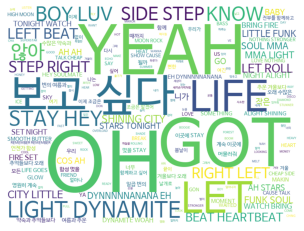

GOT의 빈도수: 13
OH의 빈도수: 22
YEAH의 빈도수: 14
DYNAMITE의 빈도수: 12


In [ ]:
# 빈도수 시각화
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 빈도수 확인
print("GOT의 빈도수:", bts.count('GOT'))
print("OH의 빈도수:", bts.count('OH'))
print("YEAH의 빈도수:", bts.count('YEAH'))
print("DYNAMITE의 빈도수:", bts.count('DYNAMITE'))

```




.
```

연습을 더 하고 싶다면, 아래의 문제를 풀어보세요!  

**[추가문제1] 문제1)과 연결된 문제**  

1) 문제1의 7)에서 확인한 이상치를 결측치(`np.nan`)로 변경하여라.   


In [ ]:
# 결측치로 변경
users_age['age'][(users_age.Outlier == True)] = np.nan

# 변경 확인
print(users_age[(users_age.Outlier == True)].loc[:,"age"])

user_id
30    NaN
39    NaN
188   NaN
211   NaN
418   NaN
423   NaN
559   NaN
565   NaN
767   NaN
803   NaN
839   NaN
861   NaN
915   NaN
926   NaN
Name: age, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2) 결측치를 각 그룹의 평균으로 대체하여라. 

In [ ]:
# 평균 확인
age_mean_by_occ = users_age_by_occ.mean()['age']
print(age_mean_by_occ)

# 대체 (apply() method 이용)
users_age['age'] = users_age_by_occ.age.apply(lambda x : x.fillna(round(x.mean())))

# 평균 대체 확인
print(users_age[users_age.Outlier == True].loc[:,['age','occupation']])

occupation
artist      33.782101
educator    40.350467
engineer    37.523404
retired     63.071429
student     22.838565
Name: age, dtype: float64
          age occupation
user_id                 
30       22.0    student
39       22.0    student
188      22.0    student
211      34.0     artist
418      22.0    student
423      34.0     artist
559      37.0   engineer
565      22.0    student
767      37.0   engineer
803      37.0   engineer
839      22.0    student
861      22.0    student
915      22.0    student
926      22.0    student


In [ ]:
# trasnform()를 이용할 수도 있다.

# 평균 확인
age_mean_by_occ = users_age_by_occ.mean()['age']
print(age_mean_by_occ)

# 대체 (transform() method 이용)
users_age['age'] = users_age_by_occ.age.transform(lambda x : x.fillna(round(x.mean())))

# 평균 대체 확인
print(users_age[users_age.Outlier == True].loc[:,['age','occupation']])

occupation
artist      33.782101
educator    40.350467
engineer    37.523404
retired     63.071429
student     22.838565
Name: age, dtype: float64
          age occupation
user_id                 
30       22.0    student
39       22.0    student
188      22.0    student
211      34.0     artist
418      22.0    student
423      34.0     artist
559      37.0   engineer
565      22.0    student
767      37.0   engineer
803      37.0   engineer
839      22.0    student
861      22.0    student
915      22.0    student
926      22.0    student


**[추가문제2]** 아래는 네이버 영화의 미나리 평점을 보여주는 페이지 주소이다. 

`'https://movie.naver.com/movie/bi/mi/point.nhn?code=187310'`

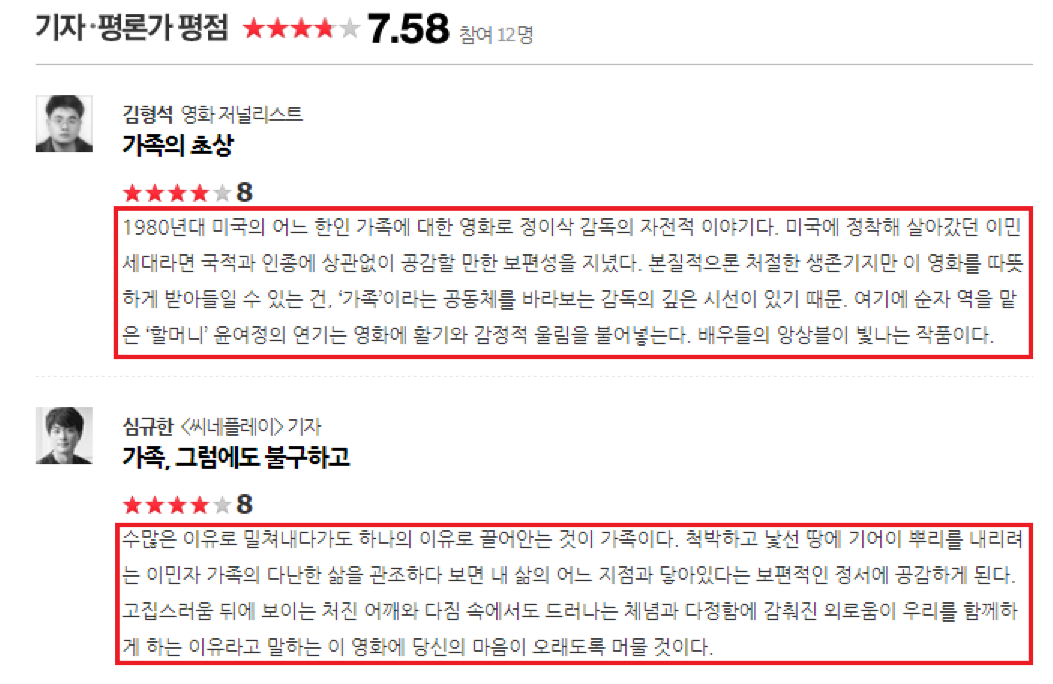

기자·평론가가 작성한 글을 가져와서 워드 클라우드로 시각화하여라. 


In [ ]:
import urllib.request
from bs4 import BeautifulSoup

1980년대 미국의 어느 한인 가족에 대한 영화로 정이삭 감독의 자전적 이야기다. 미국에 정착해 살아갔던 이민 세대라면 국적과 인종에 상관없이 공감할 만한 보편성을 지녔다. 본질적으론 처절한 생존기지만 이 영화를 따뜻하게 받아들일 수 있는 건, ‘가족’이라는 공동체를 바라보는 감독의 깊은 시선이 있기 때문. 여기에 순자 역을 맡은 ‘할머니’ 윤여정의 연기는 영화에 활기와 감정적 울림을 불어넣는다. 배우들의 앙상블이 빛나는 작품이다.
수많은 이유로 밀쳐내다가도 하나의 이유로 끌어안는 것이 가족이다. 척박하고 낯선 땅에 기어이 뿌리를 내리려는 이민자 가족의 다난한 삶을 관조하다 보면 내 삶의 어느 지점과 닿아있다는 보편적인 정서에 공감하게 된다. 고집스러움 뒤에 보이는 처진 어깨와 다짐 속에서도 드러나는 체념과 다정함에 감춰진 외로움이 우리를 함께하게 하는 이유라고 말하는 이 영화에 당신의 마음이 오래도록 머물 것이다.
낯선 곳에 뿌리내려야 하는 사람들의 삶에 긍정만이 존재할 순 없다. 오히려 거기에는 매일 반복되는 크고 작은 실패와, 익숙해지기에 점차 깊이 감각되는 두려움이 더 크게 자리한다. 하지만 <미나리>는 이민자들이 겪는 현실적 고난 가운데에서도 작게 반짝이는 삶의 순간들을 무심히 흘려보내지 않고 꽉 움켜쥔 영화다. 아메리칸 드림을 쫓아온 한 가족의 미시사를 경유해 바라보는 20세기는 그렇게 그리운 냄새, 가족의 유대와 사랑의 기억들을 소환한다. 이는  감독의 유년시절이 반영됐다는 사연과 영화의 국적을 떠나 보편적인 울림이 되어 보는 이들 각자의 마음에 가닿는다. 그의 말마따나 ‘진심의 언어(Language of Heart)’로 쓰인 기록이기 때문일 것이다. 우열을 가리는 게 무의미한 배우들의 앙상블, 화면 속의 공기까지 감각하게 만든 모든 테크니션 요소들이 조화롭다. 아름다움을 남기는 영화다.
<미나리>는 아메리칸 드림을 꿈꾸며 살아가는 이민자들이 주인공이며 전통적인 가족의 가치까지 강조한다. 이보다 미국적일 수는 없을 정도로 미국영화인 동시에 한국 관

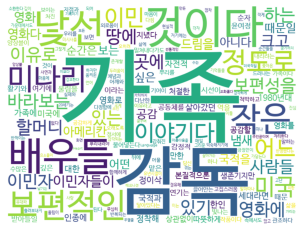

In [ ]:
# url
url = 'https://movie.naver.com/movie/bi/mi/point.nhn?code=187310'

# url의 html파일 불러오기
page = urllib.request.urlopen(url)
naver_minari = page.read().decode('utf8') # 한글이 섞여 있는 페이지의 경우 decode 방식을 'utf8' 이 아닌 'cp949' 혹은 'euc-kr'을 사용
soup = BeautifulSoup(naver_minari,'html.parser')

movie_report = ""
for item in soup.select('div.reporter p.tx_report'):
  print(item.string)
  movie_report += item.string

for item in soup.select('div.score_reple p'):
  print(item.string)
  movie_report += item.string

# 공백으로 변경
movie_report = movie_report.replace('\n',' ')
movie_report = movie_report.replace('\'' ,' ')
movie_report = movie_report.replace('의' ,' ')
movie_report = movie_report.replace(',' ,' ')
movie_report = movie_report.replace('.' ,' ')
movie_report = movie_report.replace('<' ,' ')
movie_report = movie_report.replace('>' ,' ')

# 워드클라우드 시각화
# workd cloud 만들기
wc = WordCloud(background_color= 'white', width = 800, height = 600, prefer_horizontal = True, font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate(movie_report)

# 시각화
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
